## Part 1 

# Building up a basic predictive model


In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import random
from itertools import product
from itertools import permutations
from pandas.plotting import scatter_matrix
from pylab import *
from matplotlib.colors import Normalize
from matplotlib import cm
import seaborn as sns

In [2]:
fileName = "oscars-demographics.csv"
cols = ['birthplace', 'date_of_birth','race_ethnicity', 'year_of_award', 'award']
df = pd.read_csv(fileName,usecols=cols, encoding='mac_roman')


## 1. Data cleaning

 #### Creating ldob column and inserting lenght of each row of date_of_birth

In [3]:
df.head(3)
print(df['award'].unique()) 
count_row = df.shape[0]
lengthOfDOB = df['date_of_birth'].str.len()
uniquedob = (lengthOfDOB.unique())
print(uniquedob)
df.insert(5,"ldob",lengthOfDOB)

['Best Director' 'Best Actor' 'Best Supporting Actor' 'Best Actress'
 'Best Supporting Actress']
[11 10  9 15  4]


#### A function to re-write given date of birth to format 'Day-Month-Year' 

In [4]:
years = df['date_of_birth'].dropna(axis=0)

def get_year(years):
    result = []
    for year in years:
        if len(year)==9:
            strday = year.split('-',1)[0]
            strmon = year.split('-',2)[1]
            stryr = year.split('-',3)[2]
            result.append(strday+'-'+strmon+'-19'+stryr)
        elif len(year)==4:
            result.append('01-Jan-'+year)
 
        elif len(year)==15:       
            value = year.split('[1]',1)[0]
            result.append(value)
        else:
            result.append(year)
    return result

date_result = get_year(years)
testdata = np.array(date_result, dtype=object)

df['date_of_birth']=date_result

#### A function to add country of birth to those rows that are missing the country of birth

In [5]:
def all_country(countryList):
    result = []
    for country in countryList:
     if country.count(',') >= 2:
      result.append(country)
     else:
      strplace = country.split(',',1)[0]      
      newcountry = 'USA' 
      if country.count(',') == 1:
       if (len(country.split(',',1)[1]) == 3 or (country.split(',',1)[1])== ' New York City'):   #le,ca etc      
        result.append(country+', ' + newcountry)
       else:
        result.append(country)   
      else:  
       if country.count(',') == 0:  
        result.append(strplace+ ', ' + newcountry)     
    return result   
countryList= df['birthplace']          
final_value = all_country(countryList)
finaldata = pd.Series(final_value)

df['birthplace'] = finaldata

#### Adding new column 'award_age' which records the difference between the year of award and the year for birth of each row

In [6]:
date_of_birth = pd.to_datetime(df.date_of_birth)
def getaward_age(date_of_birth):
    result= []
    award= df['year_of_award']
    i=0
    for born in date_of_birth:
        ##print(award[i])
        result.append(award[i] - born.year) 
        i=i+1
    return result 

age=getaward_age(date_of_birth)
df.insert(6,"award_age",age)

#### Adding a new column 'country' which records the country of origin for each row

In [7]:
def add_new_c_country(add_ctry):
  result = []
  coun = add_ctry
    #i = 0\n
  for c in add_ctry:
   x = c.rfind(",")
   y = c[x+1:]
   result.append(y)
   #print(y)\n",
  return result
ctry = add_new_c_country(df['birthplace'])
df.insert(7,"country",ctry)

#### Checking the new data frame for missing values and duplicates and treating them appropriately.

In [8]:
df.drop_duplicates(inplace = True)
pd.isnull(df).values.sum()
df.to_csv('cleaned_oscar_data.csv')
df.head(10)

,birthplace,date_of_birth,race_ethnicity,year_of_award,award,ldob,award_age,country
0,"Chisinau, Moldova",30-Sep-1895,White,1927,Best Director,11,32,Moldova
1,"Glasgow, Scotland",2-Feb-1886,White,1930,Best Director,10,44,Scotland
2,"Chisinau, Moldova",30-Sep-1895,White,1931,Best Director,11,36,Moldova
3,"Chicago, Il, USA",23-Feb-1899,White,1932,Best Director,11,33,USA
4,"Salt Lake City, Ut, USA",23-Apr-1894,White,1933,Best Director,11,39,USA
5,"Glasgow, Scotland",2-Feb-1886,White,1934,Best Director,10,48,Scotland
6,"Bisacquino, Sicily, Italy",18-May-1897,White,1935,Best Director,11,38,Italy
7,"Cape Elizabeth, Me, USA",1-Feb-1894,White,1936,Best Director,10,42,USA
8,"Bisacquino, Sicily, Italy",18-May-1897,White,1937,Best Director,11,40,Italy
9,"Los Angeles, Ca, USA",3-Oct-1898,White,1938,Best Director,10,40,USA


## 2. Data exploration

#### The graph produced from the data frame shows that Most Oscar winners are from USA, therefore proving the hypotheses 

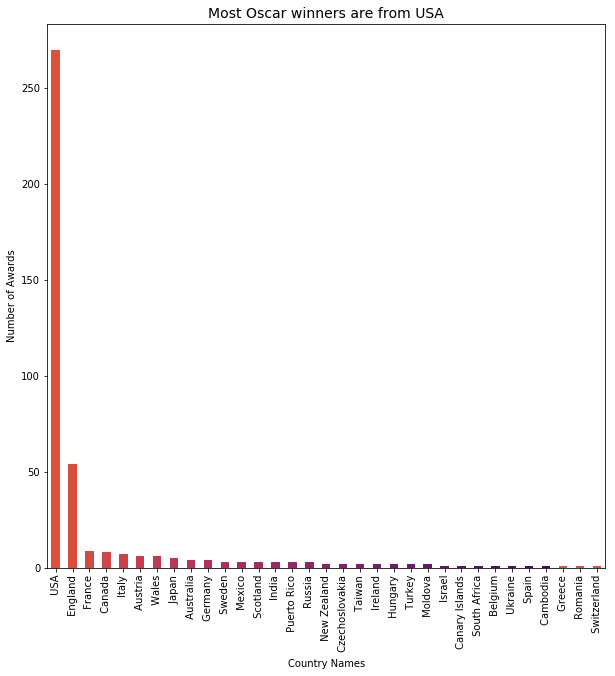

In [9]:
color = cm.inferno_r(np.linspace(.4, .8, 30))
plt.figure(figsize=[10,10])

plt.xlabel('Country Names')
plt.ylabel('Number of Awards')
plt.title('Most Oscar winners are from USA', fontsize=14)
df['country'].value_counts().plot(kind='bar',stacked=True, color=color)

#### The graph produced below from the data frame shows that Most Oscar winners are White, therefore proving the hypotheses 

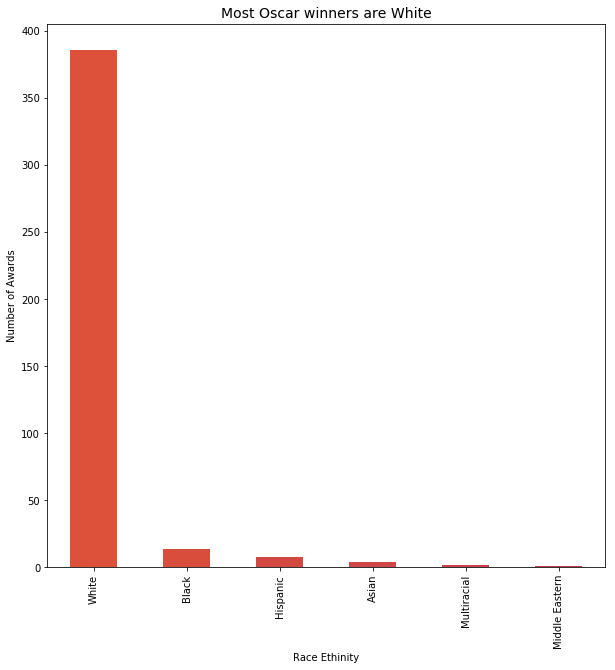

In [10]:
plt.figure(figsize=[10,10])
plt.xlabel('Race Ethinity')
plt.ylabel('Number of Awards')
plt.title('Most Oscar winners are White', fontsize = 14)
df['race_ethnicity'].value_counts().plot(kind='bar',stacked=True, color=color)

#### The graph below compares the average age of the different categories of awards and proves that Best Directors tend to be older than Best Actors or Actresses 

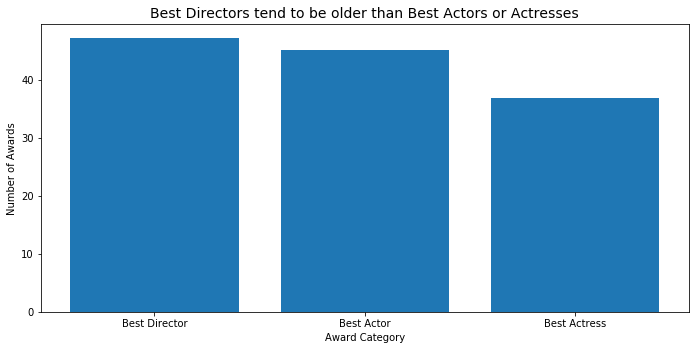

In [11]:
bestdirector=[]
bestactor=[]
supportingactor=[]
bestactress=[]
supportingactress=[]
def getavg_age(award_age):
    award_type=df['award']
    for age,typeaward in zip(award_age,award_type): 
        if typeaward == "Best Director":
            bestdirector.append(age)
        elif typeaward == "Best Actor":
            bestactor.append(age)
        elif typeaward == "Best Supporting Actor":
            supportingactor.append(age)
        elif typeaward == "Best Actress":
            bestactress.append(age)
        elif typeaward == "Best Supporting Actress":
            supportingactress.append(age)        
getavg_age(df['award_age'])
avgdirector=sum(bestdirector) / len(bestdirector)
avgactor=sum(bestactor) / len(bestactor)
avgactress=sum(bestactress) / len(bestactress)
 

fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1])
award = ['Best Director', 'Best Actor', 'Best Actress']
average = [avgdirector,avgactor,avgactress]
ax.bar(award,average)
plt.xlabel('Award Category')
plt.ylabel('Number of Awards')
plt.title('Best Directors tend to be older than Best Actors or Actresses', fontsize = 14)
plt.show()

## 3. Model building

#### The following code discretise the age by using buckets

In [12]:
bucket_1=[]
bucket_2=[]
bucket_3=[]
bucket_4=[]
def getbucket_age(award_age):
    for age in award_age:
        if age < 35:
            bucket_1.append(age)
        elif 35 <= age < 45:
            bucket_2.append(age)
        elif 45 <= age < 55:
            bucket_3.append(age)
        elif age >= 55:
            bucket_4.append(age)
           
           
getbucket_age(df['award_age'])
print("Bucket List 1 : " ,bucket_1)
print("Bucket List 2 : ",bucket_2)
print("Bucket List 3 : ",bucket_3)
print("Bucket List 4 : ",bucket_4)

Bucket List 1 :  [32, 33, 34, 33, 31, 32, 31, 33, 32, 30, 33, 33, 31, 28, 32, 21, 29, 34, 30, 23, 28, 32, 27, 32, 28, 27, 28, 31, 27, 30, 23, 25, 30, 31, 32, 34, 30, 25, 26, 28, 29, 28, 32, 30, 25, 27, 27, 32, 34, 32, 34, 22, 27, 30, 34, 27, 26, 34, 29, 31, 30, 33, 34, 30, 23, 25, 24, 31, 34, 30, 30, 33, 31, 32, 29, 27, 31, 17, 30, 25, 11, 31, 28, 34, 33, 29, 12, 29, 33, 25, 32, 34, 26, 31, 31]
Bucket List 2 :  [44, 36, 39, 38, 42, 40, 40, 42, 41, 44, 40, 39, 43, 41, 42, 36, 36, 37, 43, 37, 36, 44, 41, 43, 40, 44, 44, 43, 44, 36, 43, 40, 43, 44, 35, 38, 43, 39, 41, 35, 42, 38, 39, 35, 41, 44, 42, 39, 42, 39, 42, 36, 39, 37, 44, 37, 37, 42, 43, 44, 42, 39, 41, 43, 38, 40, 36, 44, 43, 38, 39, 41, 37, 43, 38, 39, 40, 44, 42, 40, 38, 39, 40, 42, 39, 40, 44, 43, 41, 36, 42, 36, 37, 39, 37, 43, 38, 38, 41, 35, 39, 42, 41, 39, 38, 35, 36, 35, 35, 38, 43, 42, 36, 42, 39, 42, 43, 36, 40, 35, 36, 36, 38, 36, 44, 43, 39, 42, 40, 41, 41, 39, 35, 39, 36, 44, 42, 35, 36, 35, 35, 43, 40]
Bucket List 

#### Building a model that predicts the award type based on age, race, and country of origin

In [13]:
(df['award'].value_counts())/df['award'].size

Best Actress               0.209639
Best Director              0.207229
Best Actor                 0.207229
Best Supporting Actress    0.187952
Best Supporting Actor      0.187952
Name: award, dtype: float64

In [14]:
del df['birthplace']
del df['date_of_birth']
del df['year_of_award']
del df['ldob']
#df.drop(['birthplace', 'date_of_birth','year_of_award'], axis=1)

In [15]:
print(df)

    race_ethnicity                    award  award_age     country
0            White            Best Director         32     Moldova
1            White            Best Director         44    Scotland
2            White            Best Director         36     Moldova
3            White            Best Director         33         USA
4            White            Best Director         39         USA
5            White            Best Director         48    Scotland
6            White            Best Director         38       Italy
7            White            Best Director         42         USA
8            White            Best Director         40       Italy
9            White            Best Director         40         USA
10           White            Best Director         42       Italy
11           White            Best Director         57         USA
12           White            Best Director         47         USA
13           White            Best Director         48        

In [16]:
cat_vars = ['country','race_ethnicity', 'award_age']
#using dummies we are able to convert categorical data to integers (0 and 1)
df = pd.get_dummies(df, columns=cat_vars)
print(df)

                       award  country_ Australia  country_ Austria  \
0              Best Director                   0                 0   
1              Best Director                   0                 0   
2              Best Director                   0                 0   
3              Best Director                   0                 0   
4              Best Director                   0                 0   
5              Best Director                   0                 0   
6              Best Director                   0                 0   
7              Best Director                   0                 0   
8              Best Director                   0                 0   
9              Best Director                   0                 0   
10             Best Director                   0                 0   
11             Best Director                   0                 0   
12             Best Director                   0                 0   
13             Best 

#### Spliting the data into a training and test sets and building the model

In [17]:
from sklearn import linear_model, preprocessing
from sklearn import feature_selection, metrics
clf = linear_model.LogisticRegression()
X0 = df.loc[:, df.columns != 'award']
Y0 = df['award']
selector = feature_selection.RFE(clf, n_features_to_select=5, step=1)
selector = selector.fit(X0, Y0)
r_features = X0.loc[:, selector.support_]
print("R features are:\n{}".format(','.join(list(r_features))))

R features are:
race_ethnicity_Black,award_age_27,award_age_28,award_age_30,award_age_34


In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
X = r_features
Y = df['award']
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=0)
clf.fit(trainX, trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Checking the performance of the model

In [19]:
print('Intercept : ')
print(' {}'.format(clf.intercept_))

Intercept : 
 [-1.22203413 -1.53259454 -1.33700967 -1.29073101 -1.45861697]


In [20]:
print('Coefficient : ')
print(' {}'.format(clf.coef_))

Coefficient : 
 [[ 0.16446882 -0.81066632 -0.81066632 -0.57044218 -0.43793122]
 [-0.89332948  1.88673216  1.52075011  1.25594578  1.21302505]
 [-0.98367734 -0.76337034 -0.76337034 -0.98367734 -0.88227285]
 [ 0.52024556 -0.78217041 -0.242541   -0.53108123 -0.40037312]
 [ 0.63799004 -0.15873748 -0.15873748  0.32391175  0.1243782 ]]


In [21]:
predicted = clf.predict(testX)
print("Mean hits: {}".format(np.mean(predicted==testY)))

Mean hits: 0.208


In [22]:
scores = cross_val_score(clf, X, Y, scoring='accuracy', cv=8)
print('Cross Validation Score : ')
scores

Cross Validation Score : 


array([0.32075472, 0.28301887, 0.24528302, 0.26415094, 0.24528302,
       0.30188679, 0.24489796, 0.27083333])

In [23]:
print("Mean scores: {}".format(scores.mean()))

Mean scores: 0.2720135813759466


In [24]:
print("Score against training data: {}".format(clf.score(trainX, trainY)))
print("Score against test data: {}".format(clf.score(testX, testY)))

Score against training data: 0.28620689655172415
Score against test data: 0.208


In [25]:
import statsmodels.formula.api as smf
#function for normalizing the dataframe
def normalize(df):
    #select numerical columns
    num_cols = df.select_dtypes(include=[np.number]).copy()
    df_norm = ((num_cols-num_cols.min())/(num_cols.max()-num_cols.min()))
    return df_norm

data_norm = normalize(df)

#### The confusion matrix is produced using RandomForestClassifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

forest = RandomForestClassifier(n_estimators = 500, max_depth = 2)
forest.fit(trainX,trainY)
y_pred_test = forest.predict(testX)
ypred_train = forest.predict(trainX)
confusion_matrix(testY, y_pred_test)

array([[23,  0,  0,  1,  0],
       [25,  3,  0,  0,  0],
       [32,  0,  0,  0,  0],
       [18,  0,  0,  0,  0],
       [20,  1,  0,  2,  0]], dtype=int64)

## Part 2

# Improved model

#### 1. Considering the entire dataset and creating a new data frame to build an Improved Model

In [27]:
df_data= pd.read_csv('cleaned_oscar_data.csv', encoding='mac_roman')
def getgender(award):
    result=[]
    for awardtype in award:
        if awardtype == "Best Director":
            result.append('NaN')
        elif awardtype == "Best Actor":
            result.append('Male')
        elif awardtype == "Best Supporting Actor":
            result.append('Male')
        elif awardtype == "Best Actress":
            result.append('Female')
        elif awardtype == "Best Supporting Actress":
            result.append('Female')
    return result
gender=getgender(df_data['award'])
df_data.insert(7,"Gender",gender)

del df_data['birthplace']
del df_data['date_of_birth']
del df_data['year_of_award']
del df_data['ldob']
del df_data['Unnamed: 0']
print(df_data)
category_vars = ['country','race_ethnicity', 'award_age','Gender']
df_data = pd.get_dummies(df_data, columns=category_vars)
print('Data frame after dummies creation : ')
print(df_data)
data_normP2 = normalize(df_data)


    race_ethnicity                    award  Gender  award_age     country
0            White            Best Director     NaN         32     Moldova
1            White            Best Director     NaN         44    Scotland
2            White            Best Director     NaN         36     Moldova
3            White            Best Director     NaN         33         USA
4            White            Best Director     NaN         39         USA
5            White            Best Director     NaN         48    Scotland
6            White            Best Director     NaN         38       Italy
7            White            Best Director     NaN         42         USA
8            White            Best Director     NaN         40       Italy
9            White            Best Director     NaN         40         USA
10           White            Best Director     NaN         42       Italy
11           White            Best Director     NaN         57         USA
12           White       

#### Developing an improved predictive model that predicts the award type for a given individual.

In [28]:
modelNew = linear_model.LogisticRegression()
X1 = df_data.loc[:, df_data.columns != 'award']
Y1 = df_data['award']
selectorP2 = feature_selection.RFE(modelNew, n_features_to_select=5, step=1)
selectorP2 = selectorP2.fit(X1, Y1)
p2_features = X1.loc[:, selectorP2.support_]
print("R features are:\n{}".format(','.join(list(p2_features))))
X2 = p2_features
Y2 = df_data['award']
trainX1, testX1, trainY1, testY1 = train_test_split(X2, Y2, test_size=0.3, random_state=0)
clf1 = linear_model.LogisticRegression()
clf1.fit(trainX1, trainY1)
y_pred_logistics = clf1.predict(testX1)
print('\n Intercept: ')
print(' {}'.format(clf1.intercept_))

R features are:
race_ethnicity_White,award_age_47,Gender_Female,Gender_Male,Gender_NaN

 Intercept: 
 [-1.73351129 -2.06460469 -0.98933402 -1.48865616 -1.12031187]


#### The improved accuracy score

In [29]:
print('Accuracy Score post model improvement: ')
print(accuracy_score(testY1, y_pred_logistics))

Accuracy Score post model improvement: 
0.704


In [30]:
print('Cross Validation Score post model improvement: ')
scores1 = cross_val_score(linear_model.LogisticRegression(), X2, Y2, scoring='accuracy', cv=8)
scores1

Cross Validation Score post model improvement: 


array([0.64150943, 0.66037736, 0.71698113, 0.60377358, 0.66037736,
       0.67924528, 0.6122449 , 0.72916667])

In [31]:
print("Mean Scores post model improvement: {}".format(scores1.mean()))

Mean Scores post model improvement: 0.6629594644461558


In [32]:
print("Score against training data post model improvement: {}".format(clf1.score(trainX1, trainY1)))
print("Score against test data post model improvement: {}".format(clf1.score(testX1, testY1)))

Score against training data post model improvement: 0.6517241379310345
Score against test data post model improvement: 0.704


#### 2. K- Means algorithm is used to cluster the cleaned dataset 

In [33]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
modelP2 = KMeans(n_clusters=6)
modelP2.fit(data_normP2)
print('J-score = ', modelP2.inertia_)
print(modelP2.labels_)

J-score =  583.640468393609
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 3 1 3 3 1 3 1 1 3 3 1 3 3 3 1 3 1 3 1 1 3 1 3 3
 3 3 3 1 1 1 3 3 1 3 3 1 3 1 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 1 3 3 3 3 3 3 1
 1 1 3 3 3 3 1 3 1 3 1 3 3 3 3 3 3 1 3 3 1 1 1 3 3 1 3 3 3 1 3 3 1 3 1 1 1
 3 1 3 1 3 3 3 1 3 3 1 1 3 3 3 1 3 3 3 3 3 1 3 3 1 3 3 3 3 3 3 3 1 3 3 1 3
 1 1 3 3 3 3 3 3 3 3 3 3 3 1 1 1 3 3 3 3 3 1 1 3 1 1 3 3 2 0 0 0 2 2 0 2 0
 0 2 0 2 0 0 2 0 2 0 2 2 0 2 0 2 0 2 0 0 2 2 0 0 0 2 2 0 0 0 2 2 2 0 0 2 2
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 2
 0 2 2 0 2 2 2 5 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 0 2 0 0 2 2 2 2
 2 2 2 2 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 5 2 2 0 2 2 0 2 0 2 2 2 0 2 0 0
 5 0 0 5 2 5 2 5]


In [34]:
labelsNew = modelP2.labels_
mdP2 = pd.Series(labelsNew)
data_normP2['award'] = mdP2
data_normP2.head(5)

,country_ Australia,country_ Austria,country_ Belgium,country_ Cambodia,country_ Canada,country_ Canary Islands,country_ Czechoslovakia,country_ England,country_ France,country_ Germany,...,award_age_78,award_age_79,award_age_80,award_age_81,award_age_82,award_age_83,Gender_Female,Gender_Male,Gender_NaN,award
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4


#### Justifing the clustering and visualising the clusters

In [35]:
#cluster centers 
centroids = modelP2.cluster_centers_
print ('centroids', centroids)

centroids [[ 3.84615385e-02  0.00000000e+00  1.92307692e-02 -2.16840434e-18
   7.69230769e-02 -2.16840434e-18 -4.33680869e-18  3.65384615e-01
   5.76923077e-02  5.76923077e-02  1.92307692e-02 -4.33680869e-18
   5.76923077e-02  1.92307692e-02  1.92307692e-02  3.84615385e-02
   7.69230769e-02  0.00000000e+00 -4.33680869e-18 -4.33680869e-18
   1.92307692e-02 -2.16840434e-18  1.92307692e-02  0.00000000e+00
   1.92307692e-02  1.92307692e-02  5.76923077e-02 -2.16840434e-18
  -4.33680869e-18 -4.33680869e-18 -2.22044605e-16 -2.16840434e-18
   1.92307692e-02  1.92307692e-02  2.08166817e-17  3.84615385e-02
  -2.16840434e-18 -4.33680869e-18  9.42307692e-01 -2.16840434e-18
   1.92307692e-02 -2.16840434e-18 -2.16840434e-18 -2.16840434e-18
   1.92307692e-02 -2.16840434e-18  3.84615385e-02  0.00000000e+00
   3.84615385e-02  5.76923077e-02  5.76923077e-02  5.76923077e-02
   3.84615385e-02  1.92307692e-02  3.84615385e-02  7.69230769e-02
   7.69230769e-02  3.84615385e-02 -1.73472348e-17  5.76923077e-02


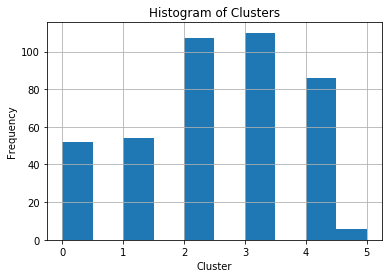

In [36]:
## histogram of the clusters
plt.hist(data_normP2['award'])
plt.title('Histogram of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [37]:
## means of the clusters
data_normP2.groupby('award').mean()

,country_ Australia,country_ Austria,country_ Belgium,country_ Cambodia,country_ Canada,country_ Canary Islands,country_ Czechoslovakia,country_ England,country_ France,country_ Germany,...,award_age_77,award_age_78,award_age_79,award_age_80,award_age_81,award_age_82,award_age_83,Gender_Female,Gender_Male,Gender_NaN
award,,,,,,,,,,,,,,,,,,,,,
0,0.038462,0.000000,0.019231,0.000000,0.076923,0.000000,0.000000,0.365385,0.057692,0.057692,...,0.000000,0.019231,0.000000,0.000000,0.019231,0.000000,0.000000,1.0,0.0,0.0
1,0.037037,0.037037,0.000000,0.018519,0.055556,0.018519,0.000000,0.462963,0.018519,0.000000,...,0.000000,0.018519,0.000000,0.000000,0.000000,0.000000,0.018519,0.0,1.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.009091,0.000000,0.009091,0.009091,0.000000,0.009091,0.000000,0.0,1.0,0.0
4,0.000000,0.046512,0.000000,0.000000,0.011628,0.000000,0.023256,0.116279,0.058140,0.011628,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0


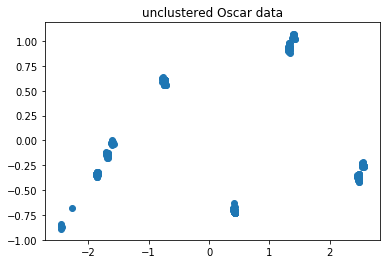

In [38]:
pca_data = PCA(n_components=2).fit(data_normP2)
pca_2d = pca_data.transform(data_normP2)
plt.scatter(pca_2d[:,0], pca_2d[:,1])
plt.title('unclustered Oscar data')
plt.show()

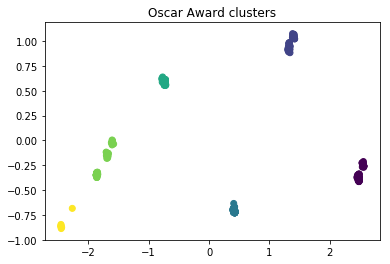

In [39]:
plt.scatter(pca_2d[:,0], pca_2d[:,1], c=labelsNew)
plt.title('Oscar Award clusters')
plt.show()


Plotting elbow method...
2 1067.688142053642
4 694.9186582731782
6 589.6428620783556
8 562.2494265160966
10 523.2125062398077
12 513.6321793893752
14 490.99565387225755


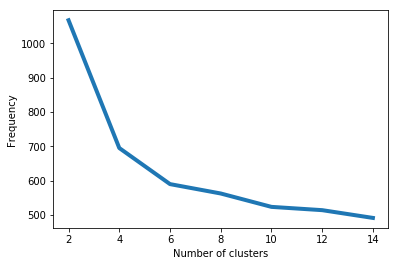

DONE


In [40]:
def elbow(data):
    print("\nPlotting elbow method...")
    sse = {}
    for k in range(2, 15, 2):
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
        print(k, kmeans.inertia_)
        sse[k] = kmeans.inertia_  
        # Inertia: Sum of distances of samples to their closest cluster center
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()), linewidth=4)
    plt.xlabel("Number of clusters")
    plt.ylabel("Frequency")
    plt.show()
    print("DONE")
elbow(data_normP2)